Computational Neurophysiology Laboratory, Brain Institute, UFRN, Brazil<br>
Rodrigo MM Santiago<br>
2023

# Reading waveform data 
*Dentate spike waveforms*

### Function import

**Custom functions**

In [1]:
import dentatespike as ds

**Scientific modules and functions**

In [2]:
import numpy as np # numerical operations
import pickle      # for data loading

# for plotting
import matplotlib.pyplot as plt
%matplotlib inline

### Data loading
**DS_waveforms matrix**<br>
*(#channels, #dentate spikes, #amplitude samples)*

In [3]:
DS_waveforms = pickle.load(open("../Senzai/DS_waveforms_mouse_A.txt","rb"))
DS_waveforms.shape

(16, 8098, 401)

In [4]:
n_Ch       = len(DS_waveforms)         # number of channels
ch_hilus   = 8                         # index of the channel located in the hilus (used for DS detection)
srate      = 1e3                       # sampling rate (1 kHz)
t_waveform = np.linspace(-200,200,401) # time vector (-200 to 200 ms)

**Linear probe LFP plot for each DS**<br>
*(three examples)*

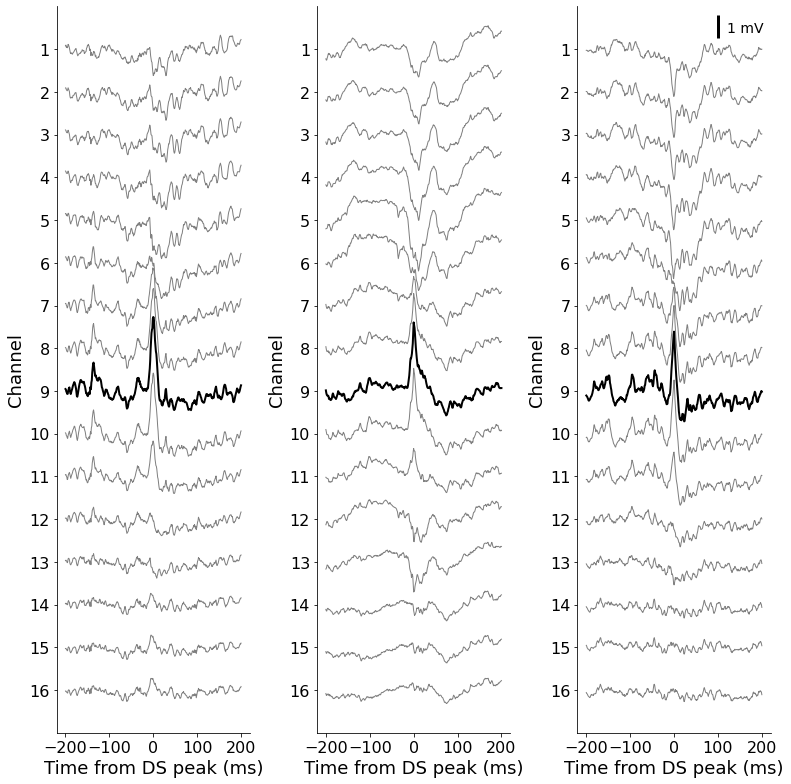

In [5]:
plt.figure(figsize=(11,11),facecolor='white')

DS_i_all = [13,302,10] # dentate spike indexes (examples)
a_level  = 0.45        # attenuation level (just for plotting)
sp       = 0           # subplot index

for DS_i in DS_i_all:
    sp += 1
    ax = plt.subplot(1,3,sp)
    for ch in range(n_Ch):
        if ch == ch_hilus: # if this is the channel located in the hilus (where DSs were detected)
            plt.plot(t_waveform,a_level*DS_waveforms[ch,DS_i]-ch,'k',lw=2) # plots black trace
        else:
            plt.plot(t_waveform,a_level*DS_waveforms[ch,DS_i]-ch,'grey',lw=1) # plots grey trace

    plt.ylim(-n_Ch,1)
    plt.yticks(np.linspace(0,1-n_Ch,n_Ch),np.arange(n_Ch)+1,size=16)
    plt.ylabel('Channel',size=18)
    plt.xticks(np.arange(-200,201,100),size=16)
    plt.xlabel('Time from DS peak (ms)',size=18);
    ax.spines[['right', 'top']].set_visible(False)
plt.tight_layout()

# amplitude scale
plt.vlines(100,-.55+.8,0+.8,'k',lw=3)
plt.annotate('1 mV', (120,0.4),size=14);

### DS classification based on waveform (WFbC)

In [6]:
ind_win = (t_waveform>=-15)*(t_waveform<=15) # indexes of the time window used for classification
t_waveform[ind_win]

array([-15., -14., -13., -12., -11., -10.,  -9.,  -8.,  -7.,  -6.,  -5.,
        -4.,  -3.,  -2.,  -1.,   0.,   1.,   2.,   3.,   4.,   5.,   6.,
         7.,   8.,   9.,  10.,  11.,  12.,  13.,  14.,  15.])

In [7]:
# Input data
X      = np.array(DS_waveforms[ch_hilus]) # all waveforms
X_win  = np.array(X)[:,ind_win]           # all waveforms from -15 to 15 ms

print(np.shape(X))
print(np.shape(X_win))

(8098, 401)
(8098, 31)


In [8]:
DS_classes_WFbC,DS1_waveforms_WFbC,DS2_waveforms_WFbC,_,_ = ds.classification.WFbC(X,X_win)

In [9]:
# Waveforms of each DS type
DS1_waveforms_WFbC = DS_waveforms[ch_hilus][(DS_classes_WFbC*-1+1).astype(bool),:]
DS2_waveforms_WFbC = DS_waveforms[ch_hilus][(DS_classes_WFbC).astype(bool),:]

**Mean waveforms and widths of each DS type**

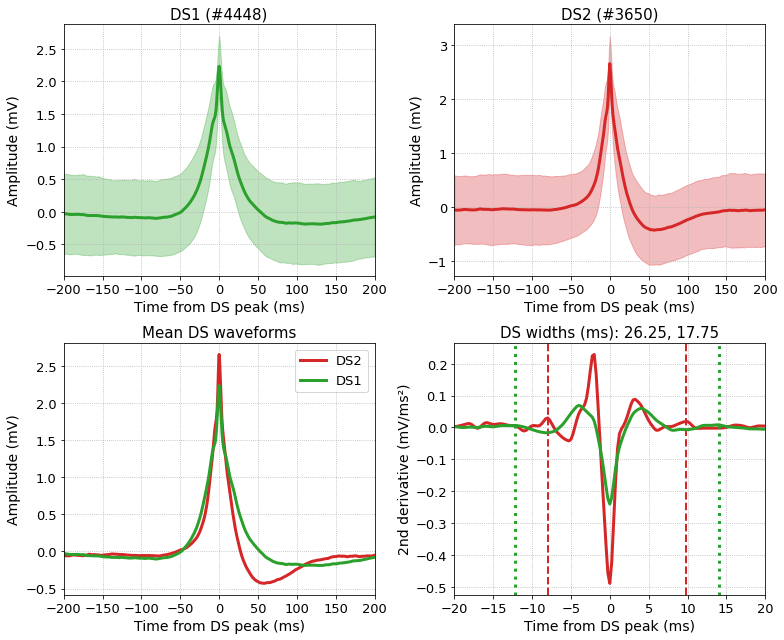

In [10]:
ds.analysis.plotDSclass(DS_classes_WFbC,DS1_waveforms_WFbC,DS2_waveforms_WFbC,t_waveform);